# Dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../Datasets/dow.csv', index_col=0)

In [4]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0
2,2010-01-04,40.810001,41.099998,40.389999,33.436996,6894300,AXP,0
3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0
4,2010-01-04,57.650002,59.189999,57.509998,40.732986,7325600,CAT,0


In [5]:
df.tail()

,date,open,high,low,close,volume,tic,day
97008,2023-02-28,482.670013,483.359985,473.920013,472.312012,3902100,UNH,1
97009,2023-02-28,220.000000,221.770004,219.500000,219.100037,5385400,V,1
97010,2023-02-28,38.700001,38.970001,38.549999,37.506733,16685300,VZ,1
97011,2023-02-28,35.480000,35.779999,35.320000,34.379196,8847000,WBA,1
97012,2023-02-28,141.000000,142.649994,140.949997,140.514648,6018000,WMT,1


In [6]:
df.shape

(97013, 8)

In [7]:
len(df.tic.unique())

30

In [8]:
df.tic.value_counts()

tic
AAPL    3311
AMGN    3311
WMT     3311
WBA     3311
VZ      3311
V       3311
UNH     3311
TRV     3311
PG      3311
NKE     3311
MSFT    3311
MRK     3311
MMM     3311
MCD     3311
KO      3311
JPM     3311
JNJ     3311
INTC    3311
IBM     3311
HON     3311
HD      3311
GS      3311
DIS     3311
CVX     3311
CSCO    3311
CRM     3311
CAT     3311
BA      3311
AXP     3311
DOW      994
Name: count, dtype: int64

In [9]:
sectors = {
    # Healthcare
    'JNJ': 'Healthcare', # Johnson & Johnson
    'MRK': 'Healthcare', # Merck & Co.
    'PFE': 'Healthcare', # Pfizer
    'UNH': 'Healthcare', # UnitedHealth
    'AMGN': 'Healthcare', #Amgen

    # Finance
    'GS': 'Finance', # Goldman Sach
    'AXP': 'Finance', # American Express
    'JPM': 'Finance', # JPMorgan 
    'TRV': 'Finance', # Travelers Companies

    # Telecom
    'VZ': 'Telecom', # Verizon

    # Consumer Retail
    'KO': 'Consumer Retail', # Coca-cola
    'MCD': 'Consumer Retail', # McDonalds
    'WMT': 'Consumer Retail', # Walmart
    'HD': 'Consumer Retail', # Home Depot
    'NKE': 'Consumer Retail', # Nike
    'DIS': 'Consumer Retail', # Walt Disney
    'PG': 'Consumer Retail', # Proctor & Gamble
    'V': 'Consumer Retail', # Visa

    # Materials
    'MMM': 'Materials', # 3M Co.
    'DOW': 'Materials', # Chemicals
    'CAT': 'Materials', # Caterpillar
    'CVX': 'Materials', # Chevron
    'XOM': 'Materials', # Exxon
    'BA': 'Materials', # Boeing
    'INTC': 'Materials',# Intel
    'HON': 'Materials', # HoneyWell (Aerospace)

    # Technology
    'AAPL': 'Technology', # Apple
    'MSFT': 'Technology', # Microsoft
    'CSCO': 'Technology', # Cisco
    'CRM': 'Technology', # Salesforce
}

sector_colors = {
    'Healthcare': 'green',
    'Finance': 'blue',
    'Telecom': 'red',
    'Consumer Retail': 'purple',
    'Materials': 'orange',
    'Technology': 'yellow',
}

default_sector = 'Unknown'
default_color = 'grey'

# https://www.dividendmax.com/market-index-constituents/dow-jones-30

# Pearson's correlation

175


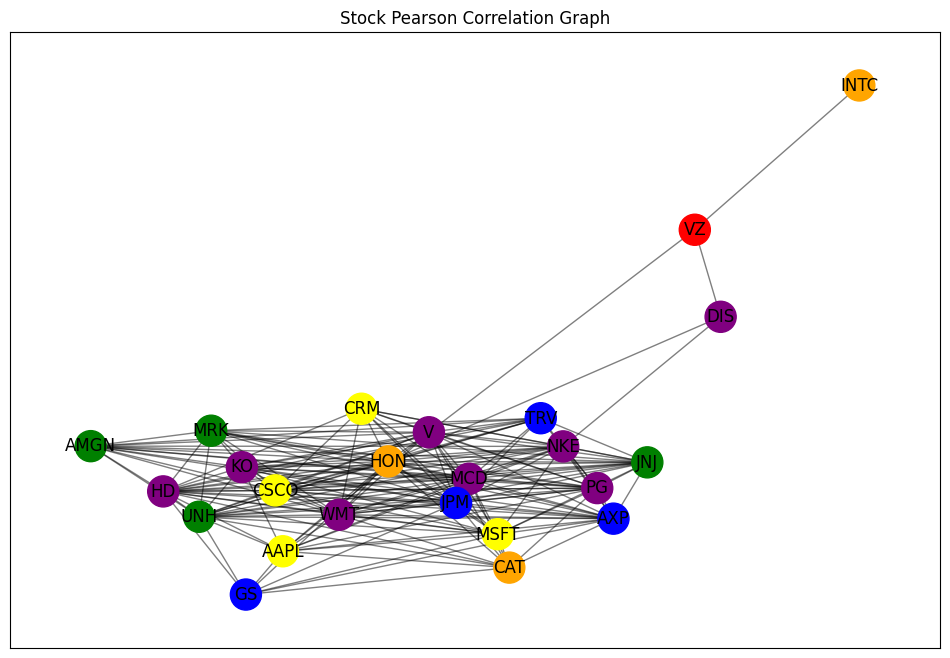

In [10]:
import pandas as pd
import os 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Assuming your data is in the 'processed' DataFrame
correlation_matrix = df.pivot(index='date', columns='tic', values='close').corr()

# Create a graph from the correlation matrix
G = nx.Graph()
for stock1 in correlation_matrix.columns:
    for stock2 in correlation_matrix.columns:
        if stock1 != stock2 and correlation_matrix[stock1][stock2] > 0.9:  # Threshold of 0.9
            G.add_edge(stock1, stock2, weight=correlation_matrix[stock1][stock2])

# Check the number of edges
num_edges = G.number_of_edges()
print(num_edges)

node_colors = []
for node in G.nodes:
    if node in sectors:
        node_colors.append(sector_colors[sectors[node]])
    else:
        print(f"Warning: {node} not found in sectors dictionary, assigning default color.")
        node_colors.append(default_color)
        
# Create a new directory 'plots' if it doesn't exist
plots_dir = '../Plots/Graphs'
os.makedirs(plots_dir, exist_ok=True)
        
# To visualize or further process the graph, you can use NetworkX functions
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Stock Pearson Correlation Graph")

# Save the figure
plot_filename = os.path.join(plots_dir, 'stock_pearson_correlation_graph.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

67


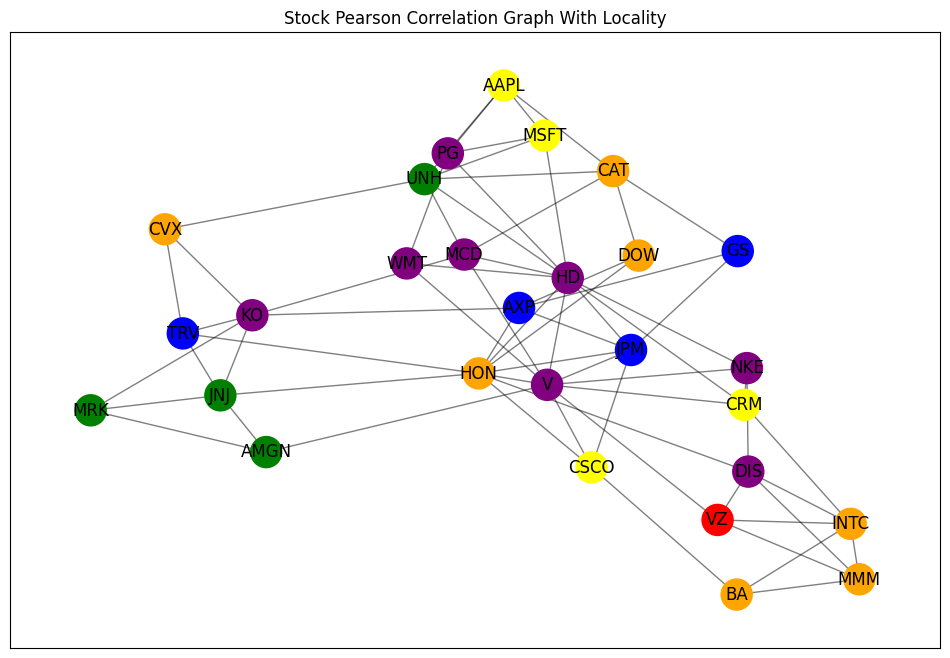

In [11]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix = df.pivot(index='date', columns='tic', values='close').corr()

from sklearn.neighbors import NearestNeighbors

# Convert the correlation matrix to a numpy array, fill diagonal with 0 to ignore self-correlation
correlation_array = correlation_matrix.values
np.fill_diagonal(correlation_array, 0)

# Initialize NearestNeighbors with a metric='precomputed' to handle the precomputed correlation matrix
nn = NearestNeighbors(n_neighbors=3, metric='precomputed')  # Adjust n_neighbors as per your requirement
nn.fit(1 - correlation_array)  # 1 - correlation_array because NearestNeighbors works on distance, not similarity

# Get the K nearest neighbors for each stock
distances, indices = nn.kneighbors(1 - correlation_array)

G = nx.Graph()
for i, stock1 in enumerate(correlation_matrix.columns):
    for j in indices[i]:
        stock2 = correlation_matrix.columns[j]
        correlation = correlation_matrix.iloc[i, j]
        if stock1 != stock2 and correlation > 0.7:  # Adjust threshold as per your requirement
            G.add_edge(stock1, stock2, weight=correlation)

num_edges = G.number_of_edges()
print(num_edges)

node_colors = []
for node in G.nodes:
    if node in sectors:
        node_colors.append(sector_colors[sectors[node]])
    else:
        print(f"Warning: {node} not found in sectors dictionary, assigning default color.")
        node_colors.append(default_color)
        
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title("Stock Pearson Correlation Graph With Locality")

# Save the figure
plot_filename = os.path.join(plots_dir, 'stock_pearson_correlation_graph_with_locality.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

# Spearman's correlation

92


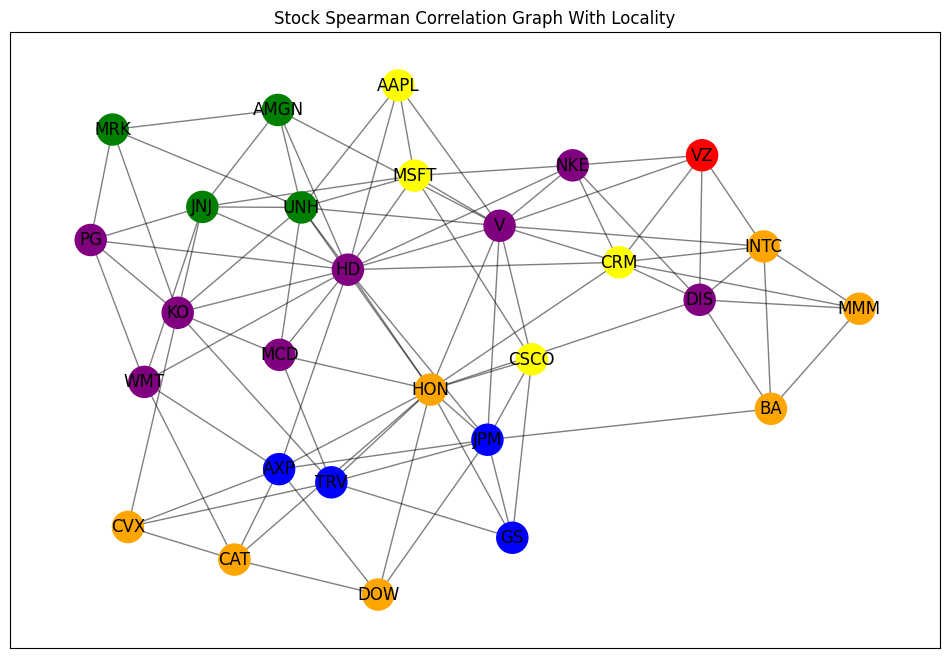

In [12]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

correlation_matrix1 = df.pivot(index='date', columns='tic', values='close').corr(method='spearman')

from sklearn.neighbors import NearestNeighbors

# Convert the correlation matrix to a numpy array, fill diagonal with 0 to ignore self-correlation
correlation_array = correlation_matrix1.values
np.fill_diagonal(correlation_array, 0)

# Initialize NearestNeighbors with a metric='precomputed' to handle the precomputed correlation matrix
nn = NearestNeighbors(n_neighbors=4, metric='precomputed')  # Adjust n_neighbors as per your requirement
nn.fit(1 - correlation_array)  # 1 - correlation_array because NearestNeighbors works on distance, not similarity

# Get the K nearest neighbors for each stock
distances, indices = nn.kneighbors(1 - correlation_array)

G1 = nx.Graph()
for i, stock1 in enumerate(correlation_matrix1.columns):
    for j in indices[i]:
        stock2 = correlation_matrix1.columns[j]
        correlation = correlation_matrix1.iloc[i, j]
        if stock1 != stock2 and correlation > 0.7:  # Adjust threshold as per your requirement
            G1.add_edge(stock1, stock2, weight=correlation)

num_edges = G1.number_of_edges()
print(num_edges)

node_colors = []
for node in G1.nodes:
    if node in sectors:
        node_colors.append(sector_colors[sectors[node]])
    else:
        print(f"Warning: {node} not found in sectors dictionary, assigning default color.")
        node_colors.append(default_color)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G1)  # positions for all nodes
nx.draw_networkx_nodes(G1, pos, node_size=500, node_color=node_colors)
nx.draw_networkx_edges(G1, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G1, pos, font_size=12)
plt.title("Stock Spearman Correlation Graph With Locality")

# Save the figure
plot_filename = os.path.join(plots_dir, 'stock_spearman_correlation_graph_with_locality.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

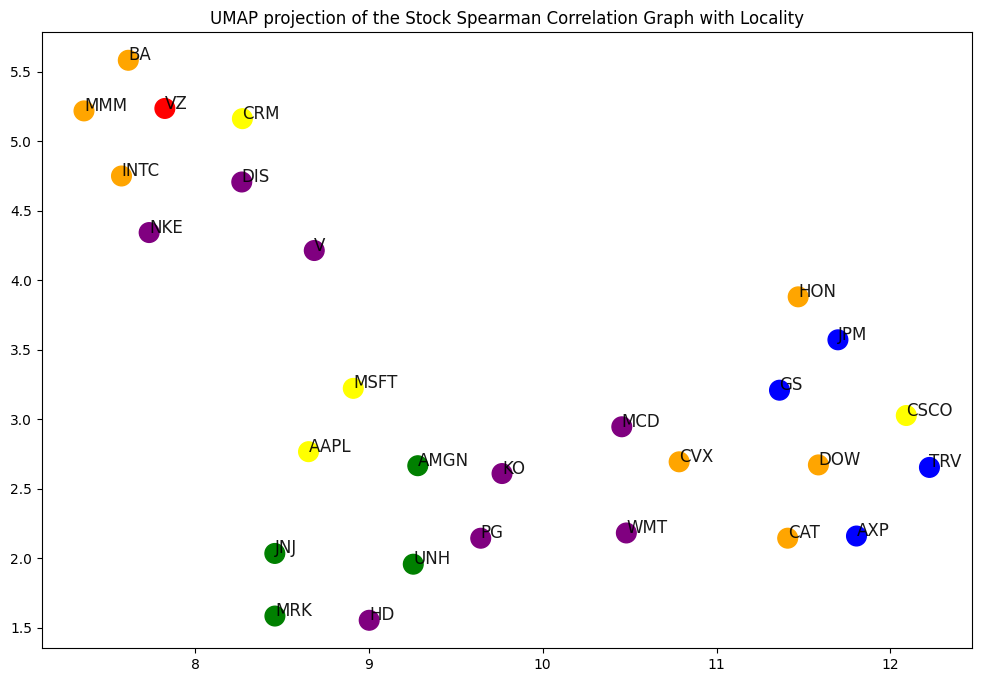

In [15]:
import umap
%matplotlib inline

# Convert the graph into an adjacency matrix and then to a numpy array
adj_matrix = np.asarray(nx.adjacency_matrix(G1).todense())

# Use UMAP to reduce dimensionality
reducer = umap.UMAP(n_neighbors=5, min_dist=0.1, metric='euclidean')
embedding = reducer.fit_transform(adj_matrix)

# Plot the UMAP embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=200, c=node_colors)
for idx, label in enumerate(G1.nodes()):
    plt.annotate(label, (embedding[idx, 0], embedding[idx, 1]), fontsize=12, alpha=0.9)
plt.title("UMAP projection of the Stock Spearman Correlation Graph with Locality")

# Save the figure
plot_filename = os.path.join(plots_dir, 'umap_stock_spearman_correlation_graph_with_locality.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

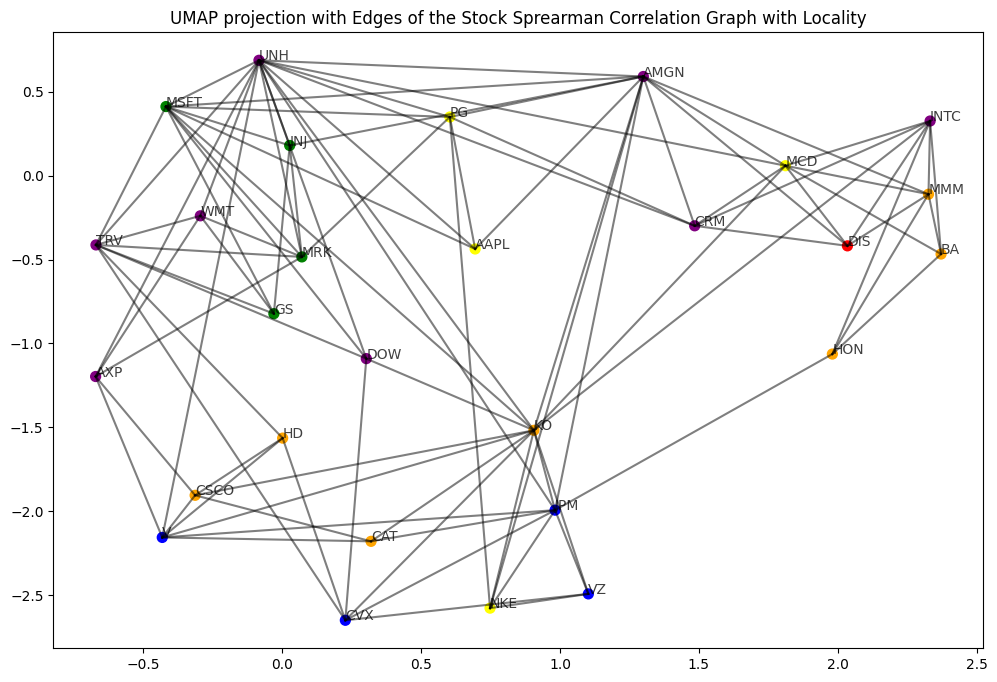

In [14]:
import umap
%matplotlib inline

# Convert the graph into an adjacency matrix and then to a numpy array
adj_matrix = np.asarray(nx.adjacency_matrix(G1).todense())

# Use UMAP to reduce dimensionality
reducer = umap.UMAP(n_neighbors=15, min_dist=0.05, metric='euclidean')
embedding = reducer.fit_transform(adj_matrix)

# Plot the UMAP embeddings with connecting edges
plt.figure(figsize=(12, 8))

# Plot edges
for edge in G1.edges():
    point1 = embedding[list(G1.nodes()).index(edge[0])]
    point2 = embedding[list(G1.nodes()).index(edge[1])]
    plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'k-', alpha=0.5)

# Plot nodes
plt.scatter(embedding[:, 0], embedding[:, 1], s=50, c=node_colors)
for idx, label in enumerate(G.nodes()):
    plt.annotate(label, (embedding[idx, 0], embedding[idx, 1]), fontsize=10, alpha=0.75)

plt.title("UMAP projection with Edges of the Stock Sprearman Correlation Graph with Locality")

# Save the figure
plot_filename = os.path.join(plots_dir, 'umap_with_edges_stock_pearson_correlation_graph_with_locality.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

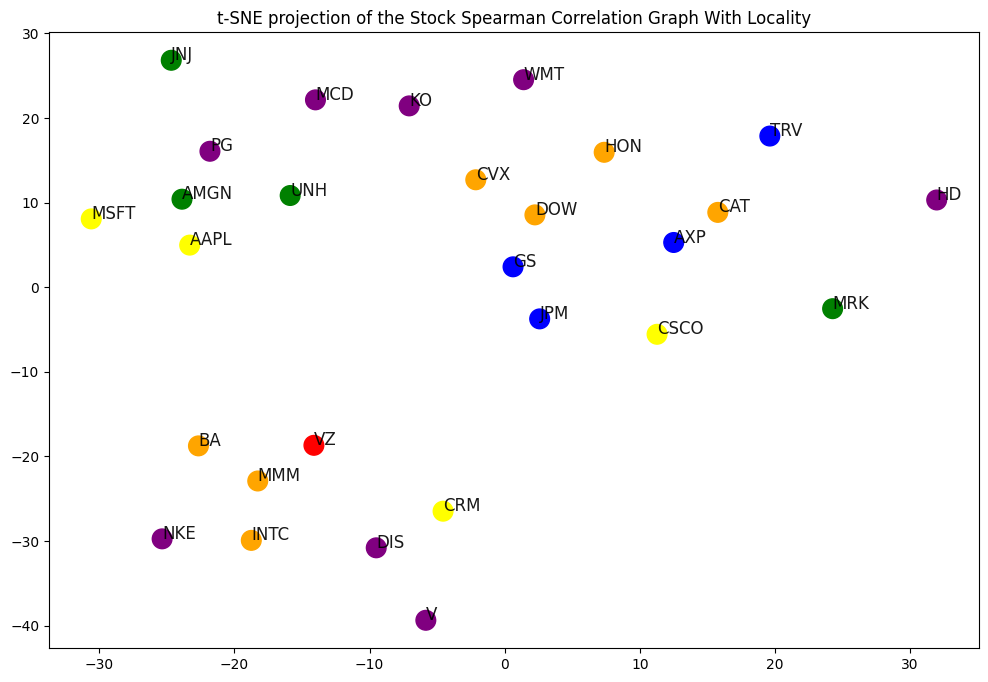

In [16]:
from sklearn.manifold import TSNE
%matplotlib inline

# Convert the graph into an adjacency matrix and then to a numpy array
adj_matrix = np.asarray(nx.adjacency_matrix(G1).todense())

# Use t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=5, n_iter=300)
embedding = tsne.fit_transform(adj_matrix)

# Plot the t-SNE embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=200, c=node_colors)
for idx, label in enumerate(G1.nodes()):
    plt.annotate(label, (embedding[idx, 0], embedding[idx, 1]), fontsize=12, alpha=0.9)
plt.title("t-SNE projection of the Stock Spearman Correlation Graph With Locality")

# Save the figure
plot_filename = os.path.join(plots_dir, 'tsne_stock_pearson_correlation_graph_with_locality.png')
plt.savefig(plot_filename)
plt.show()
plt.close()

In [16]:
print(correlation_matrix1) #Spearman correlation matrix


tic       AAPL      AMGN       AXP        BA       CAT       CRM      CSCO  \
tic                                                                          
AAPL  0.000000  0.971889  0.935932  0.838787  0.867831  0.961577  0.929222   
AMGN  0.971889  0.000000  0.928384  0.839732  0.847676  0.957498  0.933780   
AXP   0.935932  0.928384  0.000000  0.844818  0.892404  0.921952  0.909855   
BA    0.838787  0.839732  0.844818  0.000000  0.762688  0.867593  0.873688   
CAT   0.867831  0.847676  0.892404  0.762688  0.000000  0.844898  0.810840   
CRM   0.961577  0.957498  0.921952  0.867593  0.844898  0.000000  0.936765   
CSCO  0.929222  0.933780  0.909855  0.873688  0.810840  0.936765  0.000000   
CVX   0.782415  0.777587  0.881004  0.792812  0.822559  0.743727  0.796094   
DIS   0.910374  0.893027  0.876495  0.888896  0.759395  0.948564  0.907493   
DOW   0.712185  0.515080  0.849036 -0.035882  0.898547  0.450767  0.618615   
GS    0.897824  0.890677  0.889793  0.822654  0.833627  0.879887

# Graph Embeddings and Pre-processing

In [17]:
from node2vec import Node2Vec
import os

# Initialize Node2Vec model
node2vec = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Train the model
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Create a directory to store the embeddings
folder_name = "../Results/Stock_Embeddings/"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save embeddings for each ticker in the folder
for stock in df['tic'].unique():
    model.wv.save_word2vec_format(os.path.join(folder_name, f"{stock}_embedding.model"))


Computing transition probabilities:   0%|          | 0/28 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 681.63it/s]


In [18]:
from finrl.meta.preprocessor.preprocessors import FeatureEngineer

from finrl.config import (
    INDICATORS
)

fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = True)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index
Successfully added user defined features


In [19]:
processed.head(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,daily_return
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,6.487535,6.487535,0.0,5.496549
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,42.146587,42.146587,0.0,5.496549
2,2010-01-04,40.810001,41.099998,40.389999,33.436996,6894300,AXP,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,33.436996,33.436996,0.0,-0.206650
3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,43.777550,43.777550,0.0,0.309255
4,2010-01-04,57.650002,59.189999,57.509998,40.732986,7325600,CAT,0,0.0,6.509001,6.477282,100.0,66.666667,100.0,40.732986,40.732986,0.0,-0.069546


In [20]:
processed.tail(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence,daily_return
96014,2023-02-28,482.670013,483.359985,473.920013,472.312012,3902100,UNH,1,-2.985148,500.695680,465.452971,42.520484,-111.921287,13.705072,483.033968,500.489054,39.057448,1.579475
96015,2023-02-28,220.000000,221.770004,219.500000,219.100037,5385400,V,1,-0.501307,233.841764,216.765693,50.986151,-93.476947,11.525054,224.617559,217.549902,39.057448,-0.536112
96016,2023-02-28,38.700001,38.970001,38.549999,37.506733,16685300,VZ,1,-0.356701,40.831740,36.800720,46.456073,-148.254575,23.267346,38.866805,38.020401,39.057448,-0.828815
96017,2023-02-28,35.480000,35.779999,35.320000,34.379196,8847000,WBA,1,-0.203126,35.953852,34.113229,46.115830,-131.320184,24.613759,34.887938,35.957698,39.057448,-0.083386
96018,2023-02-28,141.000000,142.649994,140.949997,140.514648,6018000,WMT,1,-0.137130,146.058033,137.617821,48.541136,-41.681163,7.250607,141.363217,142.696162,39.057448,3.087200


In [21]:
processed.shape

(96019, 18)

In [22]:
import gensim

# Load all embeddings into a dictionary
embeddings_dict = {}
for stock in processed['tic'].unique():
    embedding_path = os.path.join("../Results/Stock_Embeddings/", f"{stock}_embedding.model")
    if os.path.exists(embedding_path):
        embedding_model = gensim.models.KeyedVectors.load_word2vec_format(embedding_path, binary=False)
        if stock in embedding_model:
            embeddings_dict[stock] = embedding_model[stock]
        else:
            print(f"Embedding for {stock} loaded, but stock key not found in the model!")
            embeddings_dict[stock] = [0] * 64  # Default value
    else:
        print(f"Embedding file for {stock} not found!")
        embeddings_dict[stock] = [0] * 64  # Default value

# Create an embeddings DataFrame
embeddings_df = pd.DataFrame(processed['tic'].unique(), columns=['tic'])
embeddings_df['embedding'] = embeddings_df['tic'].apply(lambda x: embeddings_dict.get(x, [0] * 64))

# Split the 'embedding' column into multiple columns
embeddings_df = pd.concat([embeddings_df['tic'], embeddings_df['embedding'].apply(pd.Series)], axis=1)

# Merge the embeddings DataFrame with the original 'processed' data
merged_data = pd.merge(processed, embeddings_df, on='tic', how='left')


Embedding for IBM loaded, but stock key not found in the model!
Embedding for WBA loaded, but stock key not found in the model!


In [23]:
merged_data.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,...,54,55,56,57,58,59,60,61,62,63
0,2010-01-04,7.622500,7.660714,7.585000,6.487535,493729600,AAPL,0,0.0,6.509001,...,0.144934,0.125291,0.050630,-0.119613,-0.047419,-0.008754,-0.026584,-0.147447,-0.245314,-0.125382
1,2010-01-04,56.630001,57.869999,56.560001,42.146587,5277400,AMGN,0,0.0,6.509001,...,0.105310,0.121886,-0.031631,0.050913,0.047712,-0.206885,-0.140801,-0.168446,-0.059381,-0.115896
2,2010-01-04,40.810001,41.099998,40.389999,33.436996,6894300,AXP,0,0.0,6.509001,...,0.370392,0.176942,0.243882,-0.067882,-0.063251,-0.055487,0.039785,-0.233170,-0.032362,-0.049076
3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0,0.0,6.509001,...,0.139982,0.199161,0.138679,-0.410258,-0.272988,0.049828,0.404024,-0.152359,0.196203,0.292293
4,2010-01-04,57.650002,59.189999,57.509998,40.732986,7325600,CAT,0,0.0,6.509001,...,0.406163,0.049335,0.038044,-0.070211,-0.051299,-0.080316,0.051094,-0.176312,-0.018347,0.075838


In [24]:
merged_data.tail(5)

,date,open,high,low,close,volume,tic,day,macd,boll_ub,...,54,55,56,57,58,59,60,61,62,63
96014,2023-02-28,482.670013,483.359985,473.920013,472.312012,3902100,UNH,1,-2.985148,500.695680,...,0.082119,0.066551,0.006313,-0.018693,0.020953,-0.090737,-0.141493,-0.075897,-0.263987,-0.108261
96015,2023-02-28,220.000000,221.770004,219.500000,219.100037,5385400,V,1,-0.501307,233.841764,...,0.077827,0.125643,0.198065,-0.107231,-0.093250,0.029504,0.117143,-0.136791,-0.134690,0.070976
96016,2023-02-28,38.700001,38.970001,38.549999,37.506733,16685300,VZ,1,-0.356701,40.831740,...,0.016495,0.187704,0.188600,-0.421261,-0.332880,0.017086,0.204156,-0.100681,-0.066377,0.077191
96017,2023-02-28,35.480000,35.779999,35.320000,34.379196,8847000,WBA,1,-0.203126,35.953852,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96018,2023-02-28,141.000000,142.649994,140.949997,140.514648,6018000,WMT,1,-0.137130,146.058033,...,0.208269,0.142269,0.114979,-0.035384,0.119091,-0.213749,-0.003252,-0.002532,-0.002974,-0.185714


In [25]:
merged_data.shape

(96019, 82)

In [26]:
print(merged_data.columns)

Index([        'date',         'open',         'high',          'low',
              'close',       'volume',          'tic',          'day',
               'macd',      'boll_ub',      'boll_lb',       'rsi_30',
             'cci_30',        'dx_30', 'close_30_sma', 'close_60_sma',
         'turbulence', 'daily_return',              0,              1,
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30,             31,             32,             33,
                   34,             35,             36,             37,
      

In [27]:
# Save DataFrame to CSV
merged_data.to_csv('../Datasets/dow_with_embeddings.csv', index=False)

In [28]:
from finrl.meta.preprocessor.preprocessors import data_split

# TRAIN_START_DATE = '2010-01-04'
# TRAIN_END_DATE = '2020-07-01'
# TRADE_START_DATE = '2021-07-01'
# TRADE_END_DATE = '2023-02-28'

TRAIN_START_DATE = '2010-01-04'
TRAIN_END_DATE = '2018-01-01'
TRADE_START_DATE = '2018-01-01'
TRADE_END_DATE = '2023-02-28'

train = data_split(merged_data, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(merged_data, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

58377
37613


In [29]:
trade.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,...,54,55,56,57,58,59,60,61,62,63
0,2018-01-02,42.540001,43.075001,42.314999,40.776520,102223600,AAPL,1,0.100700,41.790645,...,0.144934,0.125291,0.050630,-0.119613,-0.047419,-0.008754,-0.026584,-0.147447,-0.245314,-0.125382
0,2018-01-02,175.350006,177.820007,174.419998,148.734131,2301100,AMGN,1,0.324969,150.302508,...,0.105310,0.121886,-0.031631,0.050913,0.047712,-0.206885,-0.140801,-0.168446,-0.059381,-0.115896
0,2018-01-02,99.730003,99.730003,98.220001,91.171951,2746700,AXP,1,0.842426,92.097851,...,0.370392,0.176942,0.243882,-0.067882,-0.063251,-0.055487,0.039785,-0.233170,-0.032362,-0.049076
0,2018-01-02,295.750000,296.989990,295.399994,282.886383,2978900,BA,1,6.566992,290.952445,...,0.139982,0.199161,0.138679,-0.410258,-0.272988,0.049828,0.404024,-0.152359,0.196203,0.292293
0,2018-01-02,158.300003,159.389999,156.029999,136.692078,5108400,CAT,1,4.446783,141.273866,...,0.406163,0.049335,0.038044,-0.070211,-0.051299,-0.080316,0.051094,-0.176312,-0.018347,0.075838


In [378]:
import gym
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gym import spaces
from gym.utils import seeding
from stable_baselines3.common.vec_env import DummyVecEnv

matplotlib.use("Agg")

# from stable_baselines3.common import logger


class StockTradingEnv(gym.Env):
    """A stock trading environment for OpenAI gym"""

    metadata = {"render.modes": ["human"]}

    def __init__(
        self,
        df,
        stock_dim,
        hmax,
        initial_amount,
        buy_cost_pct,
        sell_cost_pct,
        reward_scaling,
        state_space,
        action_space,
        tech_indicator_list,
        turbulence_threshold=None,
        risk_indicator_col="turbulence",
        make_plots=False,
        print_verbosity=10,
        day=0,
        initial=True,
        previous_state=[],
        model_name="",
        mode="",
        iteration="",
    ):
        self.day = day
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.buy_cost_pct = buy_cost_pct
        self.sell_cost_pct = sell_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list
        self.action_space = spaces.Box(low=-1, high=1, shape=(self.action_space,))
        self.observation_space = spaces.Box(
            low=-np.inf, high=np.inf, shape=(self.state_space,)
        )
        self.data = self.df.loc[self.day, :]
        self.terminal = False
        self.make_plots = make_plots
        self.print_verbosity = print_verbosity
        self.turbulence_threshold = turbulence_threshold
        self.risk_indicator_col = risk_indicator_col
        self.initial = initial
        self.previous_state = previous_state
        self.model_name = model_name
        self.mode = mode
        self.iteration = iteration
        # initalize state
        self.state = self._initiate_state()

        # initialize reward
        self.reward = 0
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.episode = 0
        # memorize all the total balance change
        self.asset_memory = [self.initial_amount]
        self.rewards_memory = []
        self.actions_memory = []
        self.date_memory = [self._get_date()]
        # self.reset()
        self._seed()

    def _sell_stock(self, index, action):
        def _do_sell_normal():
            if self.state[index + 1] > 0:
                # Sell only if the price is > 0 (no missing data in this particular date)
                # perform sell action based on the sign of the action
                if self.state[index + self.stock_dim + 1] > 0:
                    # Sell only if current asset is > 0
                    sell_num_shares = min(
                        abs(action), self.state[index + self.stock_dim + 1]
                    )
                    sell_amount = (
                        self.state[index + 1]
                        * sell_num_shares
                        * (1 - self.sell_cost_pct)
                    )
                    # update balance
                    self.state[0] += sell_amount

                    self.state[index + self.stock_dim + 1] -= sell_num_shares
                    self.cost += (
                        self.state[index + 1] * sell_num_shares * self.sell_cost_pct
                    )
                    self.trades += 1
                else:
                    sell_num_shares = 0
            else:
                sell_num_shares = 0

            return sell_num_shares

        # perform sell action based on the sign of the action
        if self.turbulence_threshold is not None:
            if self.turbulence >= self.turbulence_threshold:
                if self.state[index + 1] > 0:
                    # Sell only if the price is > 0 (no missing data in this particular date)
                    # if turbulence goes over threshold, just clear out all positions
                    if self.state[index + self.stock_dim + 1] > 0:
                        # Sell only if current asset is > 0
                        sell_num_shares = self.state[index + self.stock_dim + 1]
                        sell_amount = (
                            self.state[index + 1]
                            * sell_num_shares
                            * (1 - self.sell_cost_pct)
                        )
                        # update balance
                        self.state[0] += sell_amount
                        self.state[index + self.stock_dim + 1] = 0
                        self.cost += (
                            self.state[index + 1] * sell_num_shares * self.sell_cost_pct
                        )
                        self.trades += 1
                    else:
                        sell_num_shares = 0
                else:
                    sell_num_shares = 0
            else:
                sell_num_shares = _do_sell_normal()
        else:
            sell_num_shares = _do_sell_normal()

        return sell_num_shares

    def _buy_stock(self, index, action):
        def _do_buy():
            if self.state[index + 1] > 0:
                # Buy only if the price is > 0 (no missing data in this particular date)
                available_amount = self.state[0] // self.state[index + 1]
                # print('available_amount:{}'.format(available_amount))

                # update balance
                buy_num_shares = min(available_amount, action)
                buy_amount = (
                    self.state[index + 1] * buy_num_shares * (1 + self.buy_cost_pct)
                )
                self.state[0] -= buy_amount

                self.state[index + self.stock_dim + 1] += buy_num_shares

                self.cost += self.state[index + 1] * buy_num_shares * self.buy_cost_pct
                self.trades += 1
            else:
                buy_num_shares = 0

            return buy_num_shares

        # perform buy action based on the sign of the action
        if self.turbulence_threshold is None:
            buy_num_shares = _do_buy()
        else:
            if self.turbulence < self.turbulence_threshold:
                buy_num_shares = _do_buy()
            else:
                buy_num_shares = 0
                pass

        return buy_num_shares

#     def _make_plot(self):
#         plt.plot(self.asset_memory, "r")
#         plt.savefig("../Results/Account_Values_Trades/account_value_trade_{}.png".format(self.episode))
#         plt.close()
        
    def _make_plot(self):
        # Directory where you want to save the plots
        plots_directory = "../Results/Account_Values_Trades"

        # Check if the directory exists, create it if it doesn't
        if not os.path.exists(plots_directory):
            os.makedirs(plots_directory)

        # Now, saving the plot should work without raising a FileNotFoundError
        plot_filename = f"{plots_directory}/account_value_trade_{self.episode}.png"
        plt.plot(self.asset_memory, "r")
        plt.savefig(plot_filename)
        plt.close()

    def step(self, actions):
        self.terminal = self.day >= len(self.df.index.unique()) - 1
        if self.terminal:
            # print(f"Episode: {self.episode}")
            if self.make_plots:
                self._make_plot()
            end_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            df_total_value = pd.DataFrame(self.asset_memory)
            tot_reward = (
                self.state[0]
                + sum(
                    np.array(self.state[1 : (self.stock_dim + 1)])
                    * np.array(
                        self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)]
                    )
                )
                - self.initial_amount
            )
            df_total_value.columns = ["account_value"]
            df_total_value["date"] = self.date_memory
            df_total_value["daily_return"] = df_total_value["account_value"].pct_change(
                1
            )
            if df_total_value["daily_return"].std() != 0:
                sharpe = (
                    (252 ** 0.5)
                    * df_total_value["daily_return"].mean()
                    / df_total_value["daily_return"].std()
                )
            df_rewards = pd.DataFrame(self.rewards_memory)
            df_rewards.columns = ["account_rewards"]
            df_rewards["date"] = self.date_memory[:-1]
            if self.episode % self.print_verbosity == 0:
                print(f"day: {self.day}, episode: {self.episode}")
                print(f"begin_total_asset: {self.asset_memory[0]:0.2f}")
                print(f"end_total_asset: {end_total_asset:0.2f}")
                print(f"total_reward: {tot_reward:0.2f}")
                print(f"total_cost: {self.cost:0.2f}")
                print(f"total_trades: {self.trades}")
                if df_total_value["daily_return"].std() != 0:
                    print(f"Sharpe: {sharpe:0.3f}")
                print("=================================")

            if (self.model_name != "") and (self.mode != ""):
                df_actions = self.save_action_memory()
                df_actions.to_csv(
                    "../Results/actions_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    )
                )
                df_total_value.to_csv(
                    "../Results/account_value_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                df_rewards.to_csv(
                    "../Results/account_rewards_{}_{}_{}.csv".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                plt.plot(self.asset_memory, "r")
                plt.savefig(
                    "../Results/account_value_{}_{}_{}.png".format(
                        self.mode, self.model_name, self.iteration
                    ),
                    index=False,
                )
                plt.close()

            # Add outputs to logger interface
            # logger.record("environment/portfolio_value", end_total_asset)
            # logger.record("environment/total_reward", tot_reward)
            # logger.record("environment/total_reward_pct", (tot_reward / (end_total_asset - tot_reward)) * 100)
            # logger.record("environment/total_cost", self.cost)
            # logger.record("environment/total_trades", self.trades)

            return self.state, self.reward, self.terminal, {}

        else:

            actions = actions * self.hmax  # actions initially is scaled between 0 to 1
            actions = actions.astype(
                int
            )  # convert into integer because we can't by fraction of shares
            if self.turbulence_threshold is not None:
                if self.turbulence >= self.turbulence_threshold:
                    actions = np.array([-self.hmax] * self.stock_dim)
            begin_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            # print("begin_total_asset:{}".format(begin_total_asset))

            argsort_actions = np.argsort(actions)

            sell_index = argsort_actions[: np.where(actions < 0)[0].shape[0]]
            buy_index = argsort_actions[::-1][: np.where(actions > 0)[0].shape[0]]

            for index in sell_index:
                # print(f"Num shares before: {self.state[index+self.stock_dim+1]}")
                # print(f'take sell action before : {actions[index]}')
                actions[index] = self._sell_stock(index, actions[index]) * (-1)
                # print(f'take sell action after : {actions[index]}')
                # print(f"Num shares after: {self.state[index+self.stock_dim+1]}")

            for index in buy_index:
                # print('take buy action: {}'.format(actions[index]))
                actions[index] = self._buy_stock(index, actions[index])

            self.actions_memory.append(actions)

            # state: s -> s+1
            self.day += 1
            self.data = self.df.loc[self.day, :]
            if self.turbulence_threshold is not None:
                if len(self.df.tic.unique()) == 1:
                    self.turbulence = self.data[self.risk_indicator_col]
                elif len(self.df.tic.unique()) > 1:
                    self.turbulence = self.data[self.risk_indicator_col].values[0]
            self.state = self._update_state()
            
#             Determine if any trades were made (non-zero actions)
            trades_made = np.any(actions != 0)

            if trades_made:
                trade_reward = 0.1
            else:
                trade_reward = -0.1

            end_total_asset = self.state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
            )
            self.asset_memory.append(end_total_asset)
            self.date_memory.append(self._get_date())
            self.reward = end_total_asset - begin_total_asset
            self.rewards_memory.append(self.reward)
            self.reward = self.reward * self.reward_scaling + trade_reward

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        # initiate state
        self.state = self._initiate_state()

        if self.initial:
            self.asset_memory = [self.initial_amount]
        else:
            # Calculate total asset considering stocks and embeddings
            previous_total_asset = self.previous_state[0] + sum(
                np.array(self.state[1 : (self.stock_dim + 1)])
                * np.array(
                    self.previous_state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)]
                )
            )
            self.asset_memory = [previous_total_asset]

        self.day = 0
        self.data = self.df.loc[self.day, :]
        self.turbulence = 0
        self.cost = 0
        self.trades = 0
        self.terminal = False
        self.rewards_memory = []
        self.actions_memory = []
        self.date_memory = [self._get_date()]

        self.episode += 1

        return self.state


    def render(self, mode="human", close=False):
        return self.state

    def _initiate_state(self):
        if self.initial:
            # For Initial State
            if len(self.df.tic.unique()) > 1:
                # for multiple stock
                state = (
                    [self.initial_amount]
                    + self.data.close.values.tolist()
                    + [0] * self.stock_dim
                    + sum(
                        [
                            self.data[tech].values.tolist()
                            for tech in self.tech_indicator_list
                        ],
                        [],
                    )
                    # Add embeddings to the state
                    + sum(
                        [
                            self.data[i].values.tolist()
                            for i in range(EMBEDDING_DIMENSION)
                        ],
                        [],
                    )
                )
            else:
                # for single stock
                state = (
                    [self.initial_amount]
                    + [self.data.close]
                    + [0] * self.stock_dim
                    + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                    # Add embeddings to the state
                    + [self.data[i] for i in range(EMBEDDING_DIMENSION)]
                )
        else:
            # Using Previous State
            if len(self.df.tic.unique()) > 1:
                # for multiple stock
                state = (
                    [self.previous_state[0]]
                    + self.data.close.values.tolist()
                    + self.previous_state[
                        (self.stock_dim + 1) : (self.stock_dim * 2 + 1)
                    ]
                    + sum(
                        [
                            self.data[tech].values.tolist()
                            for tech in self.tech_indicator_list
                        ],
                        [],
                    )
                    # Add embeddings to the state
                    + sum(
                        [
                            self.data[i].values.tolist()
                            for i in range(EMBEDDING_DIMENSION)
                        ],
                        [],
                    )
                )
            else:
                # for single stock
                state = (
                    [self.previous_state[0]]
                    + [self.data.close]
                    + self.previous_state[
                        (self.stock_dim + 1) : (self.stock_dim * 2 + 1)
                    ]
                    + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                    # Add embeddings to the state
                    + [self.data[i] for i in range(EMBEDDING_DIMENSION)]
                )
        return state
    
    def _update_state(self):
        if len(self.df.tic.unique()) > 1:
            # for multiple stock
            state = (
                [self.state[0]]
                + self.data.close.values.tolist()
                + list(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
                + sum(
                    [
                        self.data[tech].values.tolist()
                        for tech in self.tech_indicator_list
                    ],
                    [],
                )
                # Add embeddings to the state
                + sum(
                    [
                        self.data[i].values.tolist()
                        for i in range(EMBEDDING_DIMENSION)
                    ],
                    [],
                )
            )

        else:
            # for single stock
            state = (
                [self.state[0]]
                + [self.data.close]
                + list(self.state[(self.stock_dim + 1) : (self.stock_dim * 2 + 1)])
                + sum([[self.data[tech]] for tech in self.tech_indicator_list], [])
                # Add embeddings to the state
                + [self.data[i] for i in range(EMBEDDING_DIMENSION)]
            )
        return state


    def _get_date(self):
        if len(self.df.tic.unique()) > 1:
            date = self.data.date.unique()[0]
        else:
            date = self.data.date
        return date

    def save_asset_memory(self):
        date_list = self.date_memory
        asset_list = self.asset_memory
        # print(len(date_list))
        # print(len(asset_list))
        df_account_value = pd.DataFrame(
            {"date": date_list, "account_value": asset_list}
        )
        return df_account_value

    def save_action_memory(self):
        if len(self.df.tic.unique()) > 1:
            # date and close price length must match actions length
            date_list = self.date_memory[:-1]
            df_date = pd.DataFrame(date_list)
            df_date.columns = ["date"]

            action_list = self.actions_memory
            df_actions = pd.DataFrame(action_list)
            df_actions.columns = self.data.tic.values
            df_actions.index = df_date.date
            # df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        else:
            date_list = self.date_memory[:-1]
            action_list = self.actions_memory
            df_actions = pd.DataFrame({"date": date_list, "actions": action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

In [379]:
EMBEDDING_DIMENSION = 64  # Dimension of the Node2Vec embeddings
stock_dimension = len(processed.tic.unique())

state_space = 1 + 2*stock_dimension + EMBEDDING_DIMENSION*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 2147


In [411]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "buy_cost_pct": 0.0005,
    "sell_cost_pct": 0.0005,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "make_plots": True,
    "reward_scaling": 1e-3,
    "print_verbosity":5

}

# research and add "turbulence_threshold": in above

In [412]:
#Establish the training environment using StockTradingEnv() class
e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [413]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [414]:
from finrl.agents.stablebaselines3.models import DRLAgent

# Set up the agent using DRLAgent() class using the environment created in the previous part
agent = DRLAgent(env = env_train)

if_using_a2c = False
if_using_ddpg = False
if_using_ppo = False
if_using_td3 = False
if_using_sac = True

# TD-3

In [415]:
import numpy as np
from stable_baselines3.common.logger import configure
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.noise import OrnsteinUhlenbeckActionNoise

agent = DRLAgent(env = env_train)
TD3_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.001
}


model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

# Directly set the action noise on the model instance
model_td3.action_noise = OrnsteinUhlenbeckActionNoise(
    mean=np.zeros(n_actions), sigma=0.5 * np.ones(n_actions)
)

if if_using_td3:
  # set up logger
  tmp_path = '../Results' + '/TD3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.001}
Using cpu device


In [416]:
# Assuming model_td3 is your TD3 model instance
print("Action Noise:", model_td3.action_noise)

Action Noise: OrnsteinUhlenbeckActionNoise(mu=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.], sigma=[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5])


In [417]:
trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='TD3',
                             total_timesteps=50000) if if_using_td3 else None

# try with increasing total_timesteps for better performance

# PPO

In [418]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = '../Results' + '/PPO'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device


In [419]:
trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='PPO',
                             total_timesteps=50000) if if_using_ppo else None

# DDPG

In [420]:
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128,
              "buffer_size": 1000000,
              "learning_rate": 0.001,
              "gamma": 0.999
              }
model_ddpg = agent.get_model("ddpg", model_kwargs= DDPG_PARAMS)

if if_using_ddpg:
  # set up logger
  tmp_path = '../Results' + '/DDPG'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.001, 'gamma': 0.999}
Using cpu device


In [421]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='DDPG',
                             total_timesteps=50000) if if_using_ddpg else None

# A2C

In [422]:
agent = DRLAgent(env = env_train)
A2C_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.0007
}
model_a2c = agent.get_model("a2c", model_kwargs= A2C_PARAMS)

if if_using_a2c:
  # set up logger
  tmp_path = '../Results' + '/A2C'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device


In [423]:
trained_a2c = agent.train_model(model=model_a2c,
                             tb_log_name='A2C',
                             total_timesteps=50000) if if_using_a2c else None

# SAC

In [424]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 1000000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = '../Results' + '/SAC'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 1000000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to ../Results/SAC


In [425]:
trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='SAC',
                             total_timesteps=50000) if if_using_sac else None

day: 2012, episode: 5
begin_total_asset: 1000000.00
end_total_asset: 3262706.83
total_reward: 2262706.83
total_cost: 5105.24
total_trades: 37164
Sharpe: 1.066
-----------------------------------
| time/              |            |
|    episodes        | 4          |
|    fps             | 57         |
|    time_elapsed    | 140        |
|    total_timesteps | 8052       |
| train/             |            |
|    actor_loss      | -55.7      |
|    critic_loss     | 90.6       |
|    ent_coef        | 0.0627     |
|    ent_coef_loss   | -95.4      |
|    learning_rate   | 0.0001     |
|    n_updates       | 7951       |
|    reward          | -6.9676266 |
-----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 57        |
|    time_elapsed    | 279       |
|    total_timesteps | 16104     |
| train/             |           |
|    actor_loss      | -84.4     |
|    critic_loss     

# Trading

In [426]:
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

In [427]:
trade.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,...,54,55,56,57,58,59,60,61,62,63
0,2018-01-02,42.540001,43.075001,42.314999,40.776520,102223600,AAPL,1,0.100700,41.790645,...,0.144934,0.125291,0.050630,-0.119613,-0.047419,-0.008754,-0.026584,-0.147447,-0.245314,-0.125382
0,2018-01-02,175.350006,177.820007,174.419998,148.734131,2301100,AMGN,1,0.324969,150.302508,...,0.105310,0.121886,-0.031631,0.050913,0.047712,-0.206885,-0.140801,-0.168446,-0.059381,-0.115896
0,2018-01-02,99.730003,99.730003,98.220001,91.171951,2746700,AXP,1,0.842426,92.097851,...,0.370392,0.176942,0.243882,-0.067882,-0.063251,-0.055487,0.039785,-0.233170,-0.032362,-0.049076
0,2018-01-02,295.750000,296.989990,295.399994,282.886383,2978900,BA,1,6.566992,290.952445,...,0.139982,0.199161,0.138679,-0.410258,-0.272988,0.049828,0.404024,-0.152359,0.196203,0.292293
0,2018-01-02,158.300003,159.389999,156.029999,136.692078,5108400,CAT,1,4.446783,141.273866,...,0.406163,0.049335,0.038044,-0.070211,-0.051299,-0.080316,0.051094,-0.176312,-0.018347,0.075838


In [428]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo,
    environment = e_trade_gym) if if_using_ppo else [None, None]

df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg,
    environment = e_trade_gym) if if_using_ddpg else [None, None]

df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c,
    environment = e_trade_gym) if if_using_a2c else [None, None]

df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3,
    environment = e_trade_gym) if if_using_td3 else [None, None]

df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac,
    environment = e_trade_gym) if if_using_sac else [None, None]

hit end!


In [429]:
import os
import pandas as pd

# Create a new directory 'account_values' if it doesn't exist
values_dir = '../Datasets/Account_Values'
os.makedirs(values_dir, exist_ok=True)

In [430]:
if df_account_value_ppo is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(values_dir, 'df_account_values_ppo.csv')

    # Save the DataFrame to CSV
    df_account_value_ppo.to_csv(csv_file_path, index=True)
    
if df_account_value_ddpg is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(values_dir, 'df_account_values_ddpg.csv')

    # Save the DataFrame to CSV
    df_account_value_ddpg.to_csv(csv_file_path, index=True)
    
if df_account_value_a2c is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(values_dir, 'df_account_values_a2c.csv')

    # Save the DataFrame to CSV
    df_account_value_a2c.to_csv(csv_file_path, index=True)

if df_account_value_td3 is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(values_dir, 'df_account_values_td3.csv')

    # Save the DataFrame to CSV
    df_account_value_td3.to_csv(csv_file_path, index=True)
    
if df_account_value_sac is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(values_dir, 'df_account_values_sac.csv')

    # Save the DataFrame to CSV
    df_account_value_sac.to_csv(csv_file_path, index=True)

In [431]:
import os
import pandas as pd

# Create a new directory 'actions' if it doesn't exist
actions_dir = '../Datasets/Actions'
os.makedirs(actions_dir, exist_ok=True)

In [432]:
if df_actions_ppo is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(actions_dir, 'df_actions_ppo.csv')

    # Save the DataFrame to CSV
    df_actions_ppo.to_csv(csv_file_path, index=True)
    
if df_actions_ddpg is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(actions_dir, 'df_actions_ddpg.csv')

    # Save the DataFrame to CSV
    df_actions_ddpg.to_csv(csv_file_path, index=True)
    
if df_actions_a2c is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(actions_dir, 'df_actions_a2c.csv')

    # Save the DataFrame to CSV
    df_actions_a2c.to_csv(csv_file_path, index=True)
    
if df_actions_td3 is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(actions_dir, 'df_actions_td3.csv')

    # Save the DataFrame to CSV
    df_actions_td3.to_csv(csv_file_path, index=True)
    
if df_actions_sac is not None:

    # Define the path for the new CSV file
    csv_file_path = os.path.join(actions_dir, 'df_actions_sac.csv')

    # Save the DataFrame to CSV
    df_actions_sac.to_csv(csv_file_path, index=True)

In [433]:
import datetime
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

if if_using_ppo:
  print("\n ppo:")
  perf_stats_all_ppo = backtest_stats(account_value=df_account_value_ppo)
  perf_stats_all_ppo = pd.DataFrame(perf_stats_all_ppo)
  perf_stats_all_ppo.to_csv("../Results/ppo"+"/perf_stats_all_ppo_"+now+'.csv')

if if_using_ddpg:
  print("\n ddpg:")
  perf_stats_all_ddpg = backtest_stats(account_value=df_account_value_ddpg)
  perf_stats_all_ddpg = pd.DataFrame(perf_stats_all_ddpg)
  perf_stats_all_ddpg.to_csv("../Results/ddpg"+"/perf_stats_all_ddpg_"+now+'.csv')

if if_using_a2c:
  print("\n a2c:")
  perf_stats_all_a2c = backtest_stats(account_value=df_account_value_a2c)
  perf_stats_all_a2c = pd.DataFrame(perf_stats_all_a2c)
  perf_stats_all_a2c.to_csv("../Results/a2c"+"/perf_stats_all_a2c_"+now+'.csv')

if if_using_td3:
  print("\n atd3:")
  perf_stats_all_td3 = backtest_stats(account_value=df_account_value_td3)
  perf_stats_all_td3 = pd.DataFrame(perf_stats_all_td3)
  perf_stats_all_td3.to_csv("../Results/td3"+"/perf_stats_all_td3_"+now+'.csv')

if if_using_sac:
  print("\n sac:")
  perf_stats_all_sac = backtest_stats(account_value=df_account_value_sac)
  perf_stats_all_sac = pd.DataFrame(perf_stats_all_sac)
  perf_stats_all_sac.to_csv("../Results/sac"+"/perf_stats_all_sac_"+now+'.csv')

==============Get Backtest Results===========

 sac:
Annual return          0.033197
Cumulative returns     0.183037
Annual volatility      0.191545
Sharpe ratio           0.266570
Calmar ratio           0.105020
Stability              0.761856
Max drawdown          -0.316102
Omega ratio            1.052374
Sortino ratio          0.369618
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.841339
Daily value at risk   -0.023930
dtype: float64


In [434]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = TRADE_START_DATE,
        end = TRADE_END_DATE)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1297, 8)
Annual return          0.056182
Cumulative returns     0.324890
Annual volatility      0.215954
Sharpe ratio           0.361919
Calmar ratio           0.151491
Stability              0.693366
Max drawdown          -0.370862
Omega ratio            1.074844
Sortino ratio          0.497596
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.890986
Daily value at risk   -0.026897
dtype: float64


In [435]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX

if if_using_td3:
  backtest_plot(df_account_value_td3,
              baseline_ticker = '^DJI',
              baseline_start = TRADE_START_DATE,
              baseline_end = TRADE_END_DATE)

# Save all currently open figures
figures_folder = "../Plots/TD3"  # Specify your folder path here
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"{figures_folder}/figure_{i}.png", bbox_inches='tight')

==============Compare to DJIA===========


In [436]:
if if_using_ppo:
  backtest_plot(df_account_value_ppo,
              baseline_ticker = '^DJI',
              baseline_start = TRADE_START_DATE,
              baseline_end = TRADE_END_DATE)

# Save all currently open figures
figures_folder = "../Plots/PPO"  # Specify your folder path here
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"{figures_folder}/figure_{i}.png", bbox_inches='tight')

In [437]:
if if_using_ddpg:
  backtest_plot(df_account_value_ddpg,
              baseline_ticker = '^DJI',
              baseline_start = TRADE_START_DATE,
              baseline_end = TRADE_END_DATE)

# Save all currently open figures
figures_folder = "../Plots/DDPG"  # Specify your folder path here
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"{figures_folder}/figure_{i}.png", bbox_inches='tight')

In [438]:
if if_using_a2c:
  backtest_plot(df_account_value_a2c,
              baseline_ticker = '^DJI',
              baseline_start = TRADE_START_DATE,
              baseline_end = TRADE_END_DATE)

# Save all currently open figures
figures_folder = "../Plots/A2C"  # Specify your folder path here
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"{figures_folder}/figure_{i}.png", bbox_inches='tight')

[*********************100%%**********************]  1 of 1 completed
Shape of DataFrame:  (1297, 8)


Start date,2018-01-02
End date,2023-02-27
Total months,61
,Backtest
Annual return,3.3%
Cumulative returns,18.3%
Annual volatility,19.2%
Sharpe ratio,0.27
Calmar ratio,0.11
Stability,0.76
Max drawdown,-31.6%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.61,2020-02-06,2020-03-23,2020-11-16,203
1,18.16,2022-01-05,2022-10-10,NaT,NaN
2,15.83,2018-01-26,2018-12-24,2019-04-01,307
3,9.77,2021-08-16,2021-11-30,2022-01-05,103
4,9.59,2019-04-23,2019-05-31,2019-07-30,71


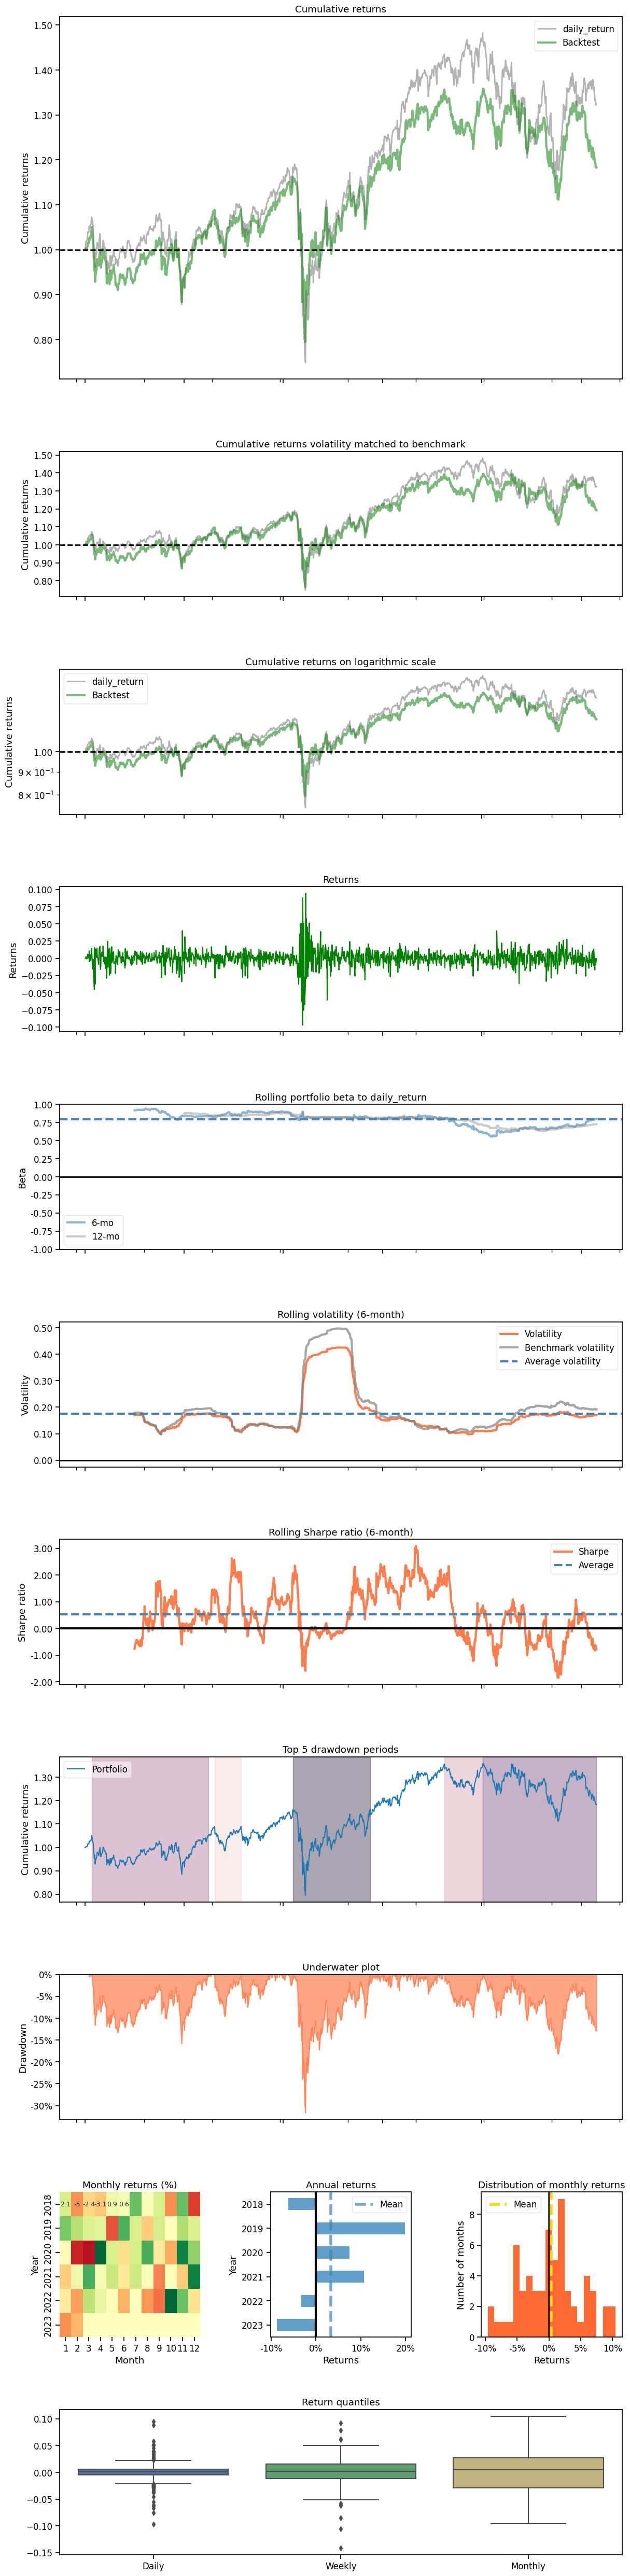

In [439]:
if if_using_sac:
  backtest_plot(df_account_value_sac,
              baseline_ticker = '^DJI',
              baseline_start = TRADE_START_DATE,
              baseline_end = TRADE_END_DATE)

# Save all currently open figures
figures_folder = "../Plots/SAC"  # Specify your folder path here
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)

for i, fig in enumerate(plt.get_fignums()):
    plt.figure(fig)
    plt.savefig(f"{figures_folder}/figure_{i}.png", bbox_inches='tight')

In [440]:
from finrl.agents.stablebaselines3.tune_sb3 import TuneSB3Optuna, LoggingCallback # Adjust the import according to your file structure

# Initialize the environments
env_train = env_train  # Your training environment
env_trade = e_trade_gym  # Your trading environment

# Initialize logging callback
logging_callback = LoggingCallback(threshold=0.01, trial_number=10, patience=5)

# Initialize the TuneSB3Optuna class for TD3
tuner = TuneSB3Optuna(
    env_train=env_train,
    model_name='td3',
    env_trade=env_trade,
    logging_callback=logging_callback,
    total_timesteps=100000,  # Adjust based on your needs
    n_trials=100  # Number of trials for the hyperparameter search
)


In [441]:
n_actions = env_train.action_space.shape[0]
n_actions

29